# En este proyecto, vamos a predecir el precio de bulldozer usando herramientas de machine learning

## 1. Defincion del problema

> En este caso, vamos a predecir el valor que poseen los bulldozers, este proyecto fue una competición creada por el año 2013, usaremos el mismo dataset para poder trabajar. De todas maneras aquí estará anexado el link hacia el proyecto. 
Link: https://www.kaggle.com/c/bluebook-for-bulldozers/data

## 2. Data
> La data viene dividida en varios csv, en los cuales podemos encontrar csv de pruebas, de entrenamientos, etc. Nuestro trabajo será adaptarnos a las necesidades del proyecto, para ello, aquí se encuentra la definición de los distintos tipos de dataset que vienen. 

   * Train.csv is the training set, which contains data through the end of 2011.
   * Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions      on this set throughout the majority of the competition. Your score on this set is used to create the public           leaderboard.
   * Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

The key fields are in *train.csv* are:

    * SalesID: the uniue identifier of the sale
    * MachineID: the unique identifier of a machine.  A machine can be sold multiple times
    * saleprice: what the machine sold for at auction (only provided in train.csv)
    * saledate: the date of the sale


## 3. Métricas

> La evaluación será que el RMSLE (root mean squared log error) estén entre el actual precio y el predicho. Para más información, visitar el link del proyecto 


## 4. Variables

> Podemos encontrar información de las variables/features en el archivo "Data Dictionary" adjunto en el proyecto

##  Ahora pasaremos a la seccción de EDA, donde exploraremos nuestra data

In [1]:
#importando las librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
#importamos el csv, que en mi caso lo tengo junto a la carpeta env
df = pd.read_csv('../data/bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [5]:
#veremos la cantidad de valores nulos que tenemos en nuestro dataset
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nuestro primero acercamiento, será hacer un plot sobre la fecha y el precio en el que se vendió el bulldozer, como nos piden una predicción según la fecha, optaremos hacer esto primero. Ya que el dataset es muy grande, tomaremos los primeros 1000 valores

In [7]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

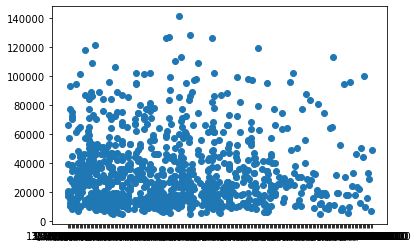

In [8]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [9]:
df.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

Observamos que tenemos saturado el eje de las x. Por mientras vamos a hacer un histograma para observar la distribución de los precios de los vehículos

In [10]:
df.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

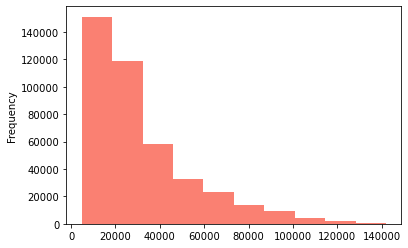

In [11]:
df['SalePrice'].plot.hist(color = 'salmon');

## Dando formato a la variable "saledate"
Como pudimos observar anteriormente, la data de time está con un formato que no nos acomoda a la hora de plotear, sin embargo, esto se puede corregir mediante "parse" o dando formato a los datos. En este caso lo haremos importando nuevamente el set de datos 

In [12]:
df = pd.read_csv('../data/bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])

In [13]:
df.saledate.dtype

dtype('<M8[ns]')

In [14]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

Ahora veremos si podemos plotear sin problemas de formato

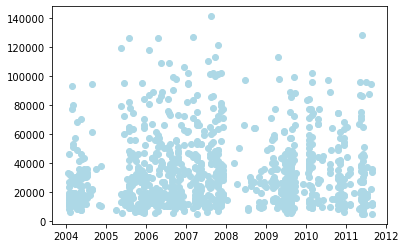

In [15]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000], color = 'lightblue');

Podemos observar que no tenemos problemas con la fecha

In [16]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Podemos ver todas las columnas que posee el df transponiendo el dataFrame

In [17]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.000000,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.000000,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.000000,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


Procederemos a ordenar nuestra data a partir de la fecha

In [18]:
df.sort_values(by=['saledate'], inplace = True, ascending=True)

In [19]:
#verificamos
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [20]:
len(df)

412698

Siempre es buena práctica crear una copia del dataframe para poder manipular de manera más segura

In [21]:
df_tmp = df.copy()

In [22]:
df_tmp.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

Podemos enriquecer nuestra data con respecto al tiempo, lo que se conoce como "Data Engineer" donde, en este caso, indicaremos si la compra fue realizada a fin de mes/año, el día del mes, el año para tener una idea de cómo se comportan las ventas a lo largo del tiempo

In [23]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear

In [24]:
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,4,28,5,119
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119


Ya extrajimos cierta información  relevante con "data engineer" para la columna relacionada a la data, ahora podemos eliminar la columna "saledate"

In [25]:
df_tmp.drop('saledate', axis = 1, inplace = True)

In [26]:
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,D38E,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,4,28,5,119
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2064,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,337G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119


Podemos hacer consultas de diferentes datos, en este caso, haremos consultas con respecto al estado donde se realizó la venta

In [27]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelando

> Una vez terminada la etapa EDA, crearemos un modelo de predicción. Para ello, podemos revisar el mapa de estimadores que nos proporciona la librería Scikit-Learn en el siguiente enlace: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [28]:
from sklearn.ensemble import RandomForestRegressor 
#np.random.seed(42)

model = RandomForestRegressor(n_jobs=1,
                             random_state = 42)

#model.fit(df_tmp.drop('SalePrice', axis = 1), df_tmp['SalePrice']) #descomentar para observar el error

Podemos percatarnos que tenemos problemas con los tipos de datos, para ello, haremos la consulta para ver qué tipos de datos tenemos y qué cantidad de nulos

In [29]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [30]:
df_tmp.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

Podemos observar que tenemos una gran cantidad de valores nulos (isna) y para ello debemos rellenar los valores nulos (recordar que en el caso de strings 'vacío' y en los numéricos con el promedio). Además observamos que tenemos una gran cantidad de variables/features del tipo "object", los modelos de machine learning pueden aceptar sólo valores numéricos, por lo que también tendremos que convertir esa data en números

## Pasar variables a números

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.api.types.is_string_dtype.html

In [31]:
pd.api.types.is_string_dtype(df_tmp['UsageBand'])

True

In [32]:
#buscaremos las columnas que contengan strings (como tipo de dato)
for label, content in df_tmp.items(): #recordar que label sería como una key() y content el value(), tal como un diccionario
    if pd.api.types.is_string_dtype(content): 
        print(label)
    

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


Debemos pasar la data que está en object/string a categorica, esto ya que nos servirá luego para pasar la data categórica a numérica

In [33]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered() #convertimos la data a categórica ordenada (alfabéticamente)

In [34]:
#consultamos por los tipos de datos
df_tmp.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

Ahora observamos que, o la data es integer/float (tipo numérico) o categórica. Categórica podríamos verla como un factor que posee niveles, de esta forma queda la data más ordenada

In [35]:
#podemos hacer una prueba
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

## Llenar los valores numéricos faltantes
> Ya convertida la data en categórica, procederemos a rellenar los valores nulos que tenemos en los datos del tipo numérico

In [36]:
#primero vamos a verificar cuales son nuestras columnas numéricas
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


Ahora vamos a ver cuales no poseen valores, que son completamente nulos

In [37]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum(): #para verificar si toda la columna es nula
            print(label)

auctioneerID
MachineHoursCurrentMeter


Aquí tenemos otra forma de ver los nulos y estar seguros

In [38]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label, df_tmp[label].isna().sum())

SalesID 0
SalePrice 0
MachineID 0
ModelID 0
datasource 0
auctioneerID 20136
YearMade 0
MachineHoursCurrentMeter 265194
saleYear 0
saleMonth 0
saleDay 0
saleDayOfWeek 0
saleDayOfYear 0


Ahora rellenaremos las columnas con el la mediana

In [39]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label] = content.fillna(content.median())

Es mejor usar median() que el promedio. Por un tema de que con la mediana podemos tomar en cuenta los valores atípicos, los outliers.
Ahora vamos a verificar si rellenó los valores

In [40]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label, df_tmp[label].isna().sum())

SalesID 0
SalePrice 0
MachineID 0
ModelID 0
datasource 0
auctioneerID 0
YearMade 0
MachineHoursCurrentMeter 0
saleYear 0
saleMonth 0
saleDay 0
saleDayOfWeek 0
saleDayOfYear 0


Ahora veremos cuantas otras columnas tenemos valores nulos

In [41]:
df_tmp.isna().sum()
    

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter         0
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Ahora llenaremos los valores nulos de las variables categóricas

Todas las variables categóricas poseen un atributo que convierte automáticamente en numérico, no es necesario usar el hotencoder, sino que usar el atributo .codes, el cual nos devuelve el valor numérico al cual pertenece el "nivel" del factor


In [42]:
#ejemplo para obtener los niveles en "string"
pd.Categorical(df.state)

['Texas', 'Florida', 'Florida', 'Florida', 'Florida', ..., 'California', 'California', 'California', 'California', 'California']
Length: 412698
Categories (53, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming']

In [43]:
#obtenemos los mismos niveles, pero en formato numérico agregando el .codes
pd.Categorical(df.state).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

Es importante entender una cosa, cuando un valor es nulo, el code vale -1, nuestra lógica de programación nos dice que, tenemos 1 (o distinto de 0) como positivo, es decir, que hay valor, y el 0 para cuando no hay valor, por lo que tendremos que cambiar el valor de -1 a 0, y eso simplemente lo hacemos agregando +1

In [44]:
#un ejemplo de observar valors nulos como "-1" en formato numérico
pd.Categorical(df_tmp.Drive_System).codes + 1 #quitar el +1 para verificar que es -1

array([0, 0, 0, ..., 0, 3, 0], dtype=int8)

Ahora cambiaremos el formato "string" a numérico

In [45]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label] = pd.Categorical(content).codes + 1

In [46]:
#veremos si se han cambiado las variables
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,1,8,6,0,0,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,0,0,0,4,2,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,1,8,6,0,0,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,0,0,0,4,2,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,1,6,5,0,0,1989,1,31,1,31


In [47]:
#consultamos si tenemos nulos
df_tmp.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

## Entrenando el modelo

> Ya teniendo la data convertida a números y sin valores nulos, podemos ahora entrenar nuestro modelo. Para ello, vamos a instanciar nuevamente nuestro RandomForestRegressor

In [48]:
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,1,8,6,0,0,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,0,0,0,4,2,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,1,8,6,0,0,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,0,0,0,4,2,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,1,6,5,0,0,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,0,2101,...,1,6,6,0,0,2012,4,28,5,119
412476,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,0,240,...,0,0,0,0,0,2012,4,28,5,119
411927,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,0,627,...,0,0,0,0,0,2012,4,28,5,119
407124,6266251,55000.0,509560,3357,149,99.0,1993,0.0,0,83,...,0,0,0,0,0,2012,4,28,5,119


In [49]:
from sklearn.ensemble import RandomForestRegressor
#instanciamos el modelo
model = RandomForestRegressor(n_jobs=1,
                             random_state=42) #randomstate es como el random.seed = 42
#entrenamos el modelo
#model.fit(df_tmp.drop('SalePrice', axis = 1), df_tmp['SalePrice'])

El entrenamiento puede tomar tiempo, ya que son más de 400.000 filas y 57 columnas

In [50]:
#procederemos a revisar el score, como no hicimos la separación entre data_Train y data_Test, lo haremos directamente con el train
#model.score(df_tmp.drop('SalePrice', axis = 1), df_tmp['SalePrice'])

Obtenemos un 0.98 en cuanto a las métricas por defecto (r2 square). Lo que sabemos, es que entre más cercano a 1.0, el modelo posee una mejor precisión. Este entrenamiento fue de prueba, para ver si podíamos entrenarlo, ahora pasaremos a dividir la data en train, test para luego evaluar mejor, ya que estamos evaluando con la misma data que ha entrenado

## Separando la data
> Vamos a separar la data en validación, ya que, al estar evaluando con la misma data que aprendió, es como hacer un examen de highscool con los mismos ejercicios de la preparatoria, es decir, no podemos medir confiablemente.

> * en la competición, piden que separemos la data, hasta el año 2011 será para entrenar y 2012 para validar. En este caso nosotros ya importamos un dataset (csv) que contiene la data de ambos (test y train), así que ahora la dividiremos. Para más información visitar el link: * https://www.kaggle.com/c/bluebook-for-bulldozers/data *

Consultaremos la cantidad de valores que poseen los años

In [51]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [52]:
#separar la data

#data de validación, nos piden de que sea del 2012
df_val = df_tmp[df_tmp.saleYear == 2012]

#data de entrenamiento, por lógica que sea distinta al 2012
df_train = df_tmp[df_tmp.saleYear != 2012]

In [53]:
print(f'cantidad de data de *validación*: {len(df_val)}, data de *entrenamiento* : {len(df_train)}')

cantidad de data de *validación*: 11573, data de *entrenamiento* : 401125


Ahora separaremos la data en X, y 

In [54]:
X_train, y_train = df_train.drop('SalePrice', axis = 1), df_train.SalePrice
X_valid, y_valid = df_val.drop('SalePrice', axis = 1), df_val.SalePrice

In [55]:
#consultamos las dimensiones
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape
#observamos que concuerdan los train con los valid

((401125, 56), (401125,), (11573, 56), (11573,))

## Creando nuestra función de evaluación. 
En la competición ocupan RMSLE (root mean squared log error), por lo que tendremos que adaptar nuestro jupyter a obtener esas metricas

In [56]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calularemos el root mean squared log error entre lada ta predicha y la data de test
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))


#crearemos una función que nos muestre las evaluaciones del modelo

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {
        'Training MAE' : mean_absolute_error(y_train, train_preds),
        'Valid MAE': mean_absolute_error(y_valid, val_preds),
        'Training RMSLE' : rmsle(y_train, train_preds),
        'Valid RMSLE' : rmsle(y_valid, val_preds),
        'Training R^2': r2_score(y_train, train_preds),
        'Valid R^2' : r2_score(y_valid, val_preds)
    }
    return scores

## Testeando nuestro modelo con un subset (para modificar los hiperparámetros)
En este caso modificaremos el hyperparameter "max_samples" para no tener que esperar los minutos que esperamos en el otro entrenamiento (donde usamos toda la data, más de 400.000)

In [58]:
#%%time #para medir el tiempo

model = RandomForestRegressor(n_jobs = -1,
                             random_state = 42,
                             max_samples = 10000)

model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [59]:
show_scores(model)

{'Training MAE': 5563.72867258336,
 'Valid MAE': 7168.9377352458305,
 'Training RMSLE': 0.2578202020674087,
 'Valid RMSLE': 0.2929702627803096,
 'Training R^2': 0.8605936890077203,
 'Valid R^2': 0.8322757239076886}

Observamos que nuestro RMSLE es de un 0.2929, lo cual es una cifra aceptable, pero podemos modificarlo para obtener una mejor cifra

## Modificando Hiperparámetros con RandomizedSearchCV

In [60]:
#aquí tenemos los hyperparameters que podemos modificar 
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': 10000,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [61]:
from sklearn.model_selection import RandomizedSearchCV

#creamos la grid

rf_grid = {
    'n_estimators' : np.arange(10, 100, 10),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1,20,2),
    'max_features':[0.5, 1, 'sqrt', 'auto'],
    'max_samples':[10000]    
}#grilla

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                   random_state = 42),
                            param_distributions=rf_grid,
                             n_iter=5,
                             cv = 5,
                             verbose = True)


rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   57.9s finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [62]:
#obtenemos los mejores parametros
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 4,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': 10}

In [63]:
#evaluamos el score
show_scores(rs_model)

{'Training MAE': 11900.955464225724,
 'Valid MAE': 13861.756785104119,
 'Training RMSLE': 0.5152952183200059,
 'Valid RMSLE': 0.5321522676500786,
 'Training R^2': 0.47742827947347277,
 'Valid R^2': 0.4644849357396743}

## Entrenar el modelo con los mejores hiperparametros

In [64]:
ideal_model = RandomForestRegressor(n_estimators = 40,
                                   min_samples_leaf = 1, 
                                   min_samples_split = 14,
                                   max_features = 0.5,
                                   n_jobs = -1, 
                                   max_samples = None,
                                   random_state = 42)

#entrenamos
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [66]:
#evaluamos 
ideal_model.score(X_valid, y_valid)

0.8810970895069677

In [67]:
#con toda la data
show_scores(ideal_model)

{'Training MAE': 2969.0355340325323,
 'Valid MAE': 5970.217940025604,
 'Training RMSLE': 0.14532159944055295,
 'Valid RMSLE': 0.24670434320997608,
 'Training R^2': 0.9584694498520994,
 'Valid R^2': 0.8810970895069677}

In [69]:
#con solo 10.000 datos
show_scores(rs_model)

{'Training MAE': 11900.955464225724,
 'Valid MAE': 13861.756785104119,
 'Training RMSLE': 0.5152952183200059,
 'Valid RMSLE': 0.5321522676500786,
 'Training R^2': 0.47742827947347277,
 'Valid R^2': 0.4644849357396743}

## Predicciones en "test data"

In [101]:
#importar el set de datos "test"
df_test = pd.read_csv('../data/bluebook-for-bulldozers/Test.csv', low_memory = False,
                     parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


Intentemos entrenar el modelo con df_test, el cual *no posee* la columna "salePrice", ya que debemos predecir.

In [73]:
#y_preds = ideal_model.predict(df_test) #desmarcar para ver el error

ValueError: could not convert string to float: 'Low'

Poseemos el error que suponíamos; la data viene en el mismo formato que el principio, lo cual quiere decir que faltan columnas (como saleYear, saleMonth) y los formatos de las variables no están en numérica

In [74]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

## Preprocesar la data. Convertir el formato df_test en el mismo que la data entrenada

In [98]:
#crearemos una función
def preprocess_df(df):
    """
    Transformaremos el dataset que recibamos al formato que nos pide el modelo ya entrenado
    """
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear
    #cursor con cmd para poner hartos cursores a la vez
    
    #eliminamos la columna que no nos servirá
    df.drop('saledate', axis = 1, inplace = True)
    
    #rellenamos los valores faltantes numéricos
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.median())
    
    #data categorica
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            
            df[label] = pd.Categorical(content).codes + 1
    
    
    return df

In [102]:
#preprocesemos la data
df_test = preprocess_df(df_test)

In [103]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,0,0,0,0,0,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,0,0,0,3,2,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,0,0,0,0,0,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,0,0,0,0,0,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,1,4,5,0,0,2012,5,10,3,131


In [104]:
df_test.dtypes

SalesID                       int64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                  int64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                      int8
fiModelDesc                   int16
fiBaseModel                   int16
fiSecondaryDesc                int8
fiModelSeries                  int8
fiModelDescriptor              int8
ProductSize                    int8
fiProductClassDesc             int8
state                          int8
ProductGroup                   int8
ProductGroupDesc               int8
Drive_System                   int8
Enclosure                      int8
Forks                          int8
Pad_Type                       int8
Ride_Control                   int8
Stick                          int8
Transmission                   int8
Turbocharged                   int8
Blade_Extension                int8
Blade_Width                 

In [108]:
#podemos ver qué columnas sobran
set(X_train.columns) - set(df_test.columns)

set()

Afortunadamente no tenemos ninguna columna que falte o sobre, así que podemos decir que tenemos la data correcta para predecir

In [110]:
#creamos predicción
test_preds = ideal_model.predict(df_test)

In [111]:
test_preds

array([18665.52635125, 15884.43387014, 50910.84676631, ...,
       12841.67083566, 20232.83137383, 27304.14691485])

In [112]:
len(test_preds)

12457

Ahora que poseemos las predicciones del dataset que nos pidió Kaggle, daremos el formato que nos pide, dos columnas, el id de la venta y el monto.
link: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [116]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds

In [117]:
df_preds

,SalesID,SalesPrice
0,1227829,18665.526351
1,1227844,15884.433870
2,1227847,50910.846766
3,1227848,58991.282217
4,1227863,55584.571151
...,...,...
12452,6643171,42815.999280
12453,6643173,13792.440117
12454,6643184,12841.670836
12455,6643186,20232.831374


Exportaremos ahora nuestro df

In [119]:
df_preds.to_csv('../data/test_prediction_final.csv', index = False)

In [120]:
df_preds

,SalesID,SalesPrice
0,1227829,18665.526351
1,1227844,15884.433870
2,1227847,50910.846766
3,1227848,58991.282217
4,1227863,55584.571151
...,...,...
12452,6643171,42815.999280
12453,6643173,13792.440117
12454,6643184,12841.670836
12455,6643186,20232.831374


## Feature Importance. 
> Una vez ya terminado el proceso de análisis, de construcción del modelo y obtener las predicciones, es momento de saber cuáles fueron las variables más importantes que determinaron que el modelo escogiera cierto valor. Cuál fue el peso de cada variable

In [121]:
ideal_model.feature_importances_

array([3.48217560e-02, 2.93413391e-02, 4.65902506e-02, 2.21269791e-03,
       3.37659844e-03, 1.89810035e-01, 3.23819327e-03, 1.17303702e-03,
       4.83433629e-02, 3.54274886e-02, 7.00775903e-02, 5.27174117e-03,
       1.72458037e-02, 1.50677118e-01, 4.36171181e-02, 6.03406146e-03,
       5.28270438e-03, 9.50342477e-03, 2.60172940e-03, 9.16686174e-02,
       5.45656062e-04, 5.76527490e-04, 7.70507596e-04, 1.91735970e-04,
       2.07053380e-03, 9.33911345e-05, 2.07183473e-03, 1.05119119e-02,
       6.22766482e-03, 3.36072135e-03, 1.04686506e-02, 1.44667567e-03,
       6.53599761e-03, 2.21836485e-03, 4.20349228e-04, 6.66548722e-03,
       1.24960452e-03, 2.79879115e-02, 8.33449555e-03, 4.75515007e-03,
       1.53803872e-03, 9.25087225e-04, 3.21066172e-03, 6.27830488e-04,
       6.86136479e-04, 3.82161001e-04, 3.91808024e-04, 2.58128265e-03,
       1.45361088e-03, 3.32377219e-04, 3.68127649e-04, 7.23153674e-02,
       3.75096980e-03, 5.71054597e-03, 2.92712102e-03, 9.98103481e-03])

In [123]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleDay', 'saleDayOfWeek', 'saleDayOfYear'],
      dtype='object')

In [149]:
#haremos una función que nos muestre los nombres de las "features" y sus respectivos valores

def plot_features_importance(columns, importances, n=20):
    df = (pd.DataFrame({'features' : columns,
                       'feature_importances':importances}).sort_values('feature_importances', ascending = False)).reset_index(drop = True)
    #ploteamos el dataframe creado
    fig, ax = plt.subplots(figsize = (10, 8))
    ax.barh(df['features'][:n], df['feature_importances'][:20], color='salmon')
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis() #damos vuelta para ver del mayor al menor
    

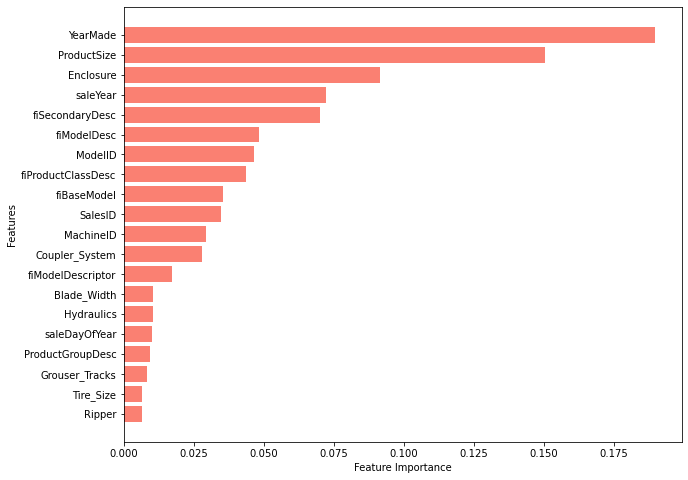

In [150]:
plot_features_importance(X_train.columns, ideal_model.feature_importances_)

## Acabamos de terminar nuestro proyecto. También podemos notar cuáles son las variables que poseen mayor relevancia a la hora de estimar un valor para nuestro bulldozer. Para futuras ocasiones intentaremos utilizar otro modelo de machine learning para ver las diferencias, pero por mientras, quedamos satisfechos con este y sus resultados. Cualquier duda o consulta, escríbanme. Saludos!